In [2]:
import pandas as pd
from sklearn.cluster import KMeans

In [13]:
tracks_df = pd.read_csv("./assets/spotify_tracks.csv")

# clustering

tracks = tracks_df[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]

# Initialize the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5)

# Train
kmeans.fit(tracks)

# Add a new column 'type' to the dataframe. This column will contain the cluster number each track belongs to.
tracks_df["type"] = kmeans.labels_

# Save the dataframe with cluster information as a new CSV file
tracks_df.to_csv("./dist/result.csv", index=False)

# Load the updated data with cluster info
tracks = pd.read_csv("dist/result.csv")

# Prompt the user to enter their favorite songs' ids
ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')

# Filter the dataframe to get the user's favorite songs
favorites = tracks[tracks['id'].isin(ids)]

# Find out the most frequent cluster among the user's favorite songs
clusters = favorites['type'].value_counts()
user_favorite_cluster = clusters.idxmax()

# Get the songs that belong to the user's favorite cluster
suggestions = tracks[tracks['type'] == user_favorite_cluster]

# Print the first 5 song suggestions
suggestions.head()

C:\Users\iwu48\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Enter comma-separated ids of your favorite songs
> 2KQsUB9DRBcJk17JWX1eXD


ValueError: attempt to get argmax of an empty sequence

In [18]:
import matplotlib.pyplot as plt

# Load Data
def loadData(path):
    tracks_df = pd.read_csv(path)
    tracks = tracks_df[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]
    return tracks

data = loadData("./assets/Spotify_tracks.csv")
data.head()


,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.294,0.698,0.606,0.000003,0.151,0.0262,0.6220
1,0.863,0.719,0.308,0.000000,0.253,0.9220,0.5890
2,0.750,0.466,0.931,0.000000,0.938,0.9440,0.0850
3,0.763,0.719,0.126,0.000000,0.113,0.9380,0.5330
4,0.770,0.460,0.942,0.000000,0.917,0.9430,0.0906


In [10]:
# Make correlation matrix
correlation = data.corr()
correlation

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
acousticness,1.000000,-0.270211,-0.715392,0.209567,-0.028647,0.159875,-0.250675
danceability,-0.270211,1.000000,0.249542,-0.286676,-0.073848,0.159351,0.524972
energy,-0.715392,0.249542,1.000000,-0.257773,0.172516,-0.128948,0.406321
instrumentalness,0.209567,-0.286676,-0.257773,1.000000,-0.092166,-0.156240,-0.313378
liveness,-0.028647,-0.073848,0.172516,-0.092166,1.000000,0.235548,0.033650
speechiness,0.159875,0.159351,-0.128948,-0.156240,0.235548,1.000000,0.028572
valence,-0.250675,0.524972,0.406321,-0.313378,0.033650,0.028572,1.000000


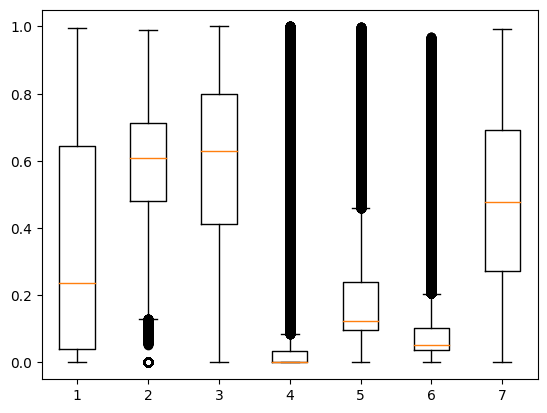

In [16]:
plt.boxplot(data)
plt.show()

In [42]:
# Function to find outliers

def outliers(data):
    mean_value = data.mean()
    std_dev = data.std()
    print(mean_value, std_dev)
    threshold = 2
    arrayLow = []
    arrayUp = []
    for d in data:
        if d < (mean_value - std_dev * threshold):
            arrayLow.append(data)
        if d > (mean_value + std_dev * threshold):
            arrayUp.append(data)
    return len(arrayLow), len(arrayUp)
            
    
    
outliers(data["energy"])

0.5864791632319328 0.2601704025337212


(4308, 0)